# Task 3 - To Explore Unsupervised Machine Learning

In this task we predict the optimum number of clusters and represent it visually (K-Means Clustering)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [6]:
#importing and reading the dataset
iris = datasets.load_iris()
iris_data =pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
iris_data.shape

(150, 4)

In [8]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [11]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Data Visualization

<Figure size 1440x720 with 0 Axes>

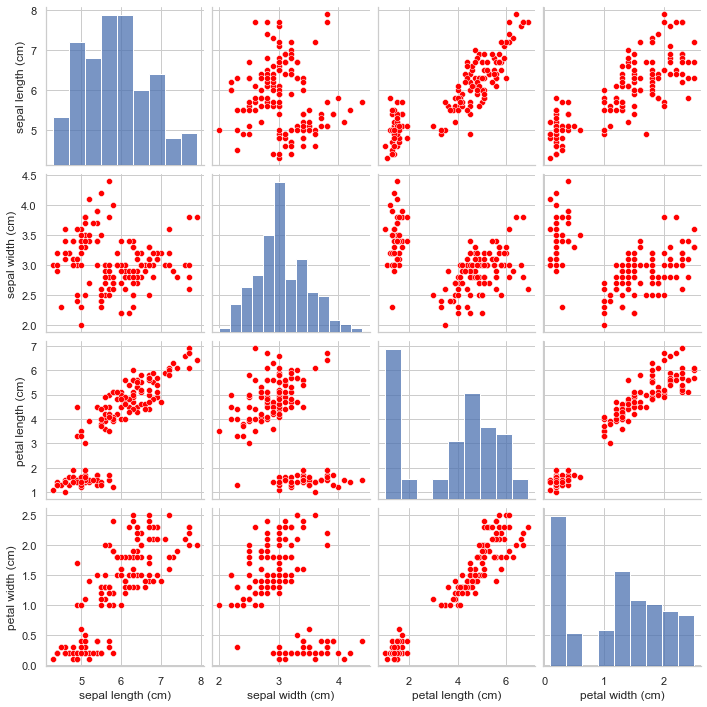

In [15]:
#ploting the data as pair plots.
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 10))
sns.pairplot(iris_data, plot_kws = {'color' : 'red'});

In [16]:
df=iris_data.iloc[:,1:5]
df.head()

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


## Plotting a heat map

<AxesSubplot:>

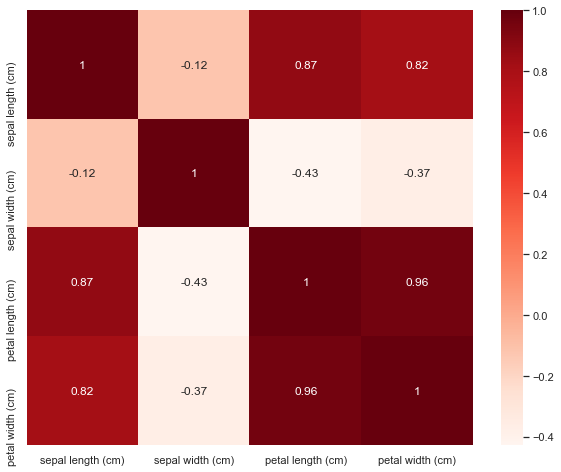

In [21]:
# Heat Map
sns.set()
plt.figure(figsize = (10, 8))
sns.heatmap(iris_data.corr(),annot= True, cmap="Reds")

## Plotting Graph

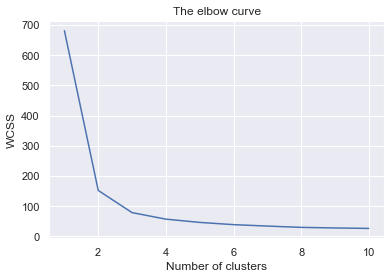

In [24]:

# finding optimum numbers of clusters
x = iris_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow curve')
plt.xlabel('Number of clusters')
# Within cluster sum of squares
plt.ylabel('WCSS') 
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_predictions = kmeans.fit_predict(x)

## Visualising the clusters

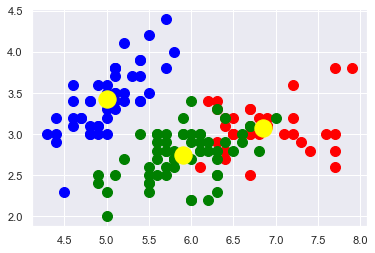

In [28]:
plt.scatter(x[y_predictions == 0, 0], x[y_predictions == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predictions == 1, 0], x[y_predictions == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predictions == 2, 0], x[y_predictions == 2, 1] , s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

# Thank You